## Assignment 4

#### Charvi Upreti

charvi.upreti2021@vitstudent.ac.in

21BCE1440




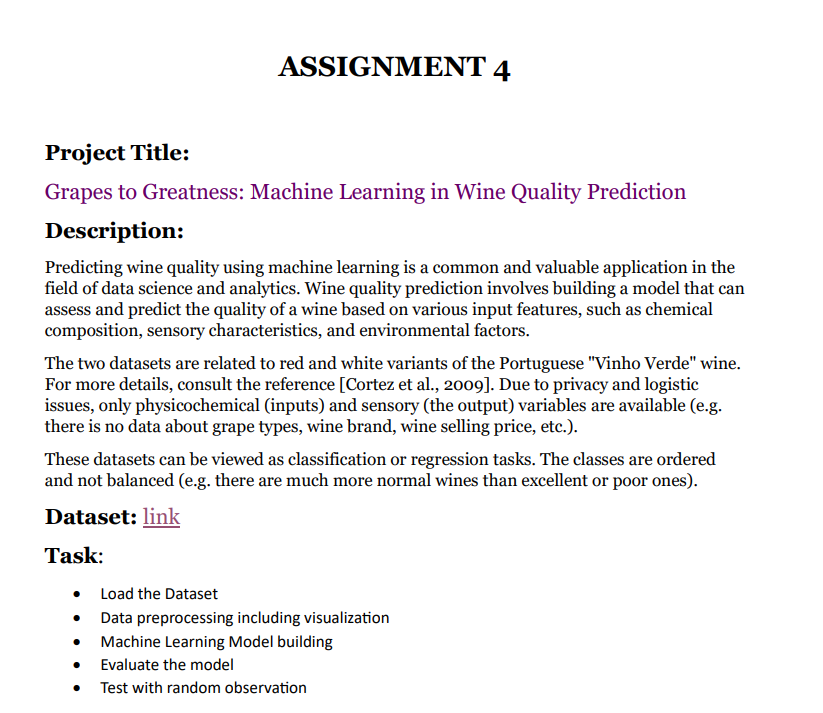

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
import pydotplus
from io import StringIO
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

### Loading the data

In [2]:
df=pd.read_csv("C:/Users/Charvi Upreti/Desktop/Assignments/Assignment 4/winequality-red.csv")

### Data preprocessing and visualization

### Data shape

In [3]:
df.shape

(1599, 12)

In [4]:
df.head().T

0        1       2       3        4
fixed acidity          7.4000   7.8000   7.800  11.200   7.4000
volatile acidity       0.7000   0.8800   0.760   0.280   0.7000
citric acid            0.0000   0.0000   0.040   0.560   0.0000
residual sugar         1.9000   2.6000   2.300   1.900   1.9000
chlorides              0.0760   0.0980   0.092   0.075   0.0760
free sulfur dioxide   11.0000  25.0000  15.000  17.000  11.0000
total sulfur dioxide  34.0000  67.0000  54.000  60.000  34.0000
density                0.9978   0.9968   0.997   0.998   0.9978
pH                     3.5100   3.2000   3.260   3.160   3.5100
sulphates              0.5600   0.6800   0.650   0.580   0.5600
alcohol                9.4000   9.8000   9.800   9.800   9.4000
quality                5.0000   5.0000   5.000   6.000   5.0000

### Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Statistical description

In [6]:
df.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

### Checking for null values

In [7]:
df.isnull().sum()
#no null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### No categorical column to perform encoding

In [9]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#no need here

### Duplicates

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [12]:
df1= df.drop_duplicates()

In [13]:
df1.shape
## We will not drop the duplicates as its greatly reducing the data set from about 200 entries.

(1359, 12)

### Index

In [14]:
df.index

RangeIndex(start=0, stop=1599, step=1)

### Outlier Detection and replacement

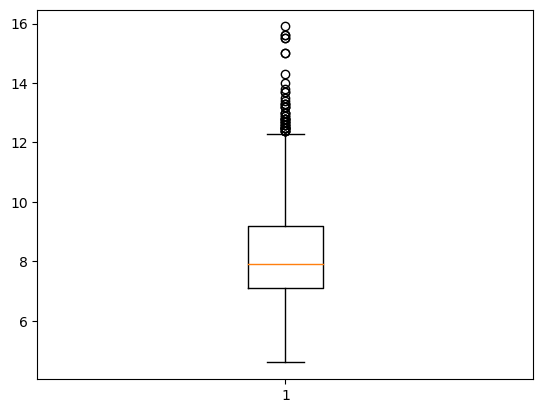

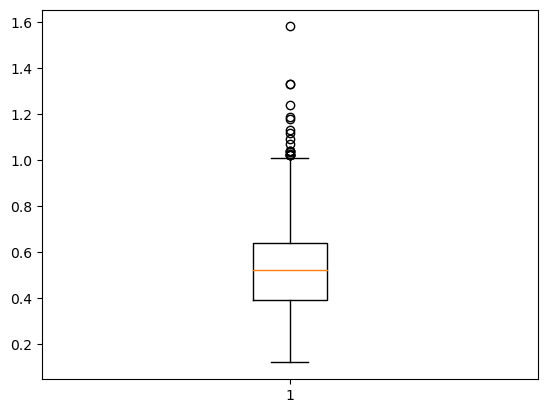

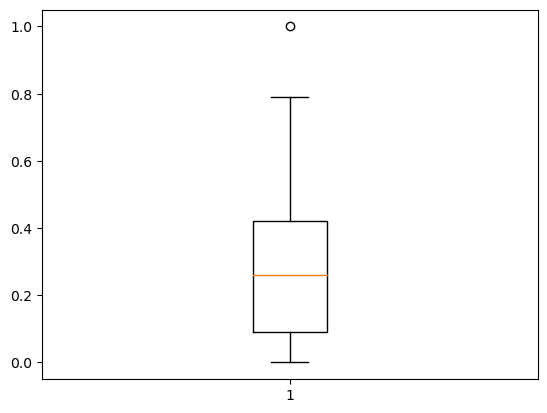

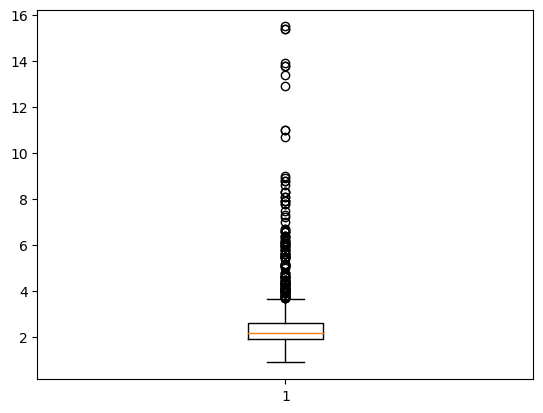

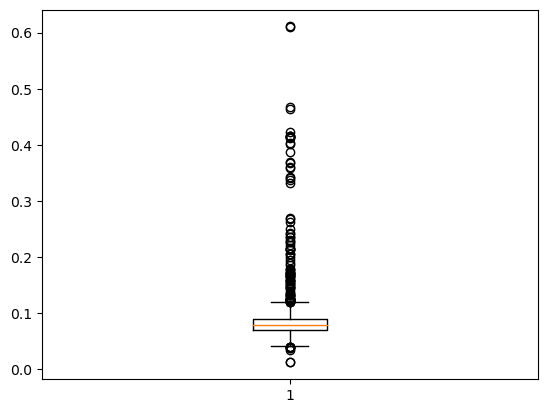

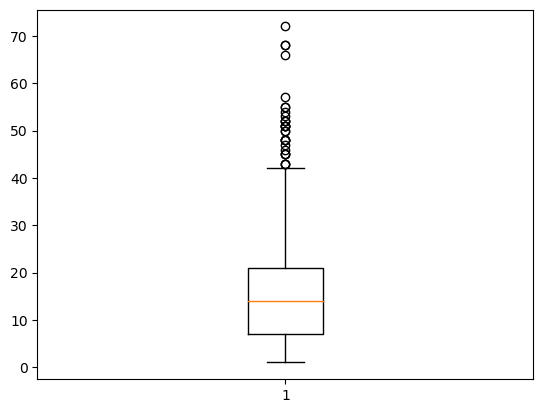

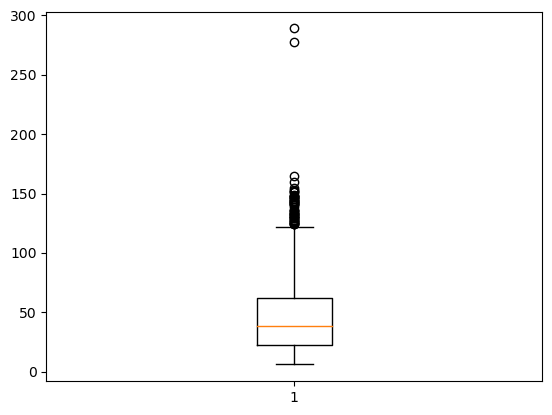

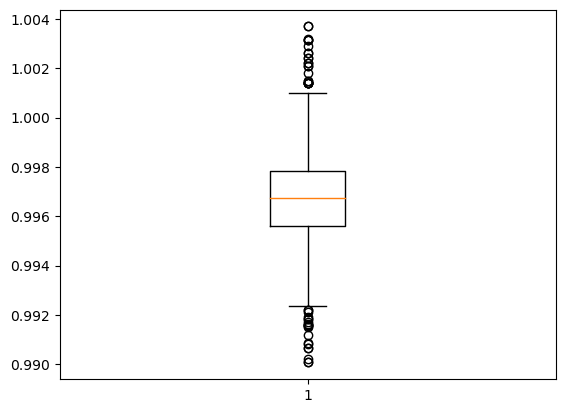

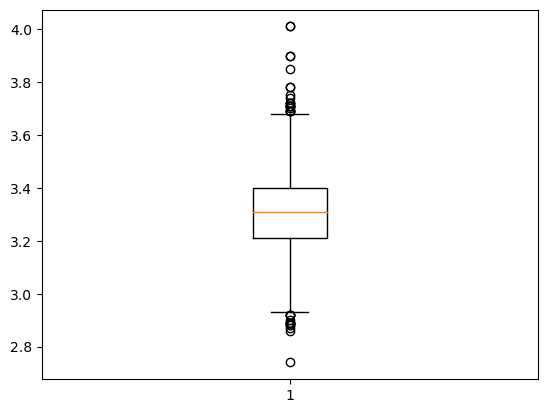

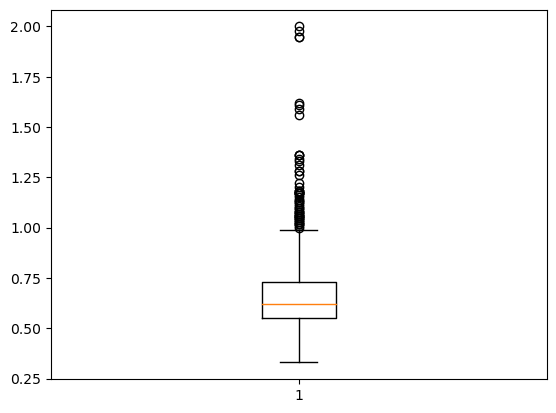

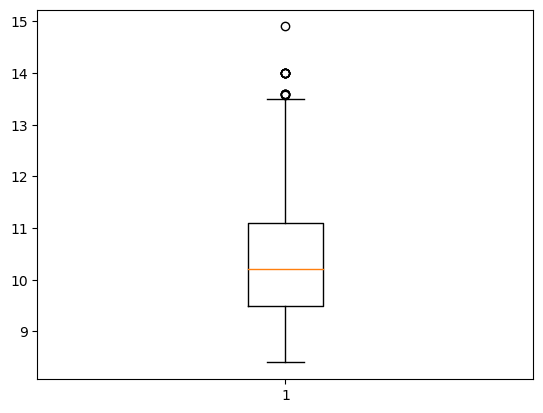

In [15]:
columns = df.columns
for col in columns:
    if col != 'quality':
        plt.figure()   
        plt.boxplot(df[col])

In [16]:
#Removing Outliers
for col in columns:
    if col != 'quality':
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        IQR = q3 - q1
        upper_limit = q3 + 1.5 * IQR
        lower_limit = q1 - 1.5 * IQR  # Corrected this line
        median=df[col].median()
        df[col] = np.where(df[col] > upper_limit,median , df[col])
        df[col] = np.where(df[col] < lower_limit, median, df[col])


### Correlation

In [17]:
df.corr().T

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.258476     0.608682   
volatile acidity          -0.258476          1.000000    -0.564257   
citric acid                0.608682         -0.564257     1.000000   
residual sugar             0.225436          0.018550     0.156708   
chlorides                  0.227814          0.138565     0.091785   
free sulfur dioxide       -0.145813          0.004853    -0.060658   
total sulfur dioxide      -0.113789          0.090253    -0.010996   
density                    0.557213          0.000445     0.338521   
pH                        -0.596539          0.225681    -0.527095   
sulphates                  0.176282         -0.315552     0.277967   
alcohol                   -0.048917         -0.214283     0.129530   
quality                    0.109637         -0.356247     0.232209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity               0.225436   0.227814            -0.145813   
volatile acidity            0.018550   0.138565             0.004853   
citric acid                 0.156708   0.091785            -0.060658   
residual sugar              1.000000   0.229396             0.040756   
chlorides                   0.229396   1.000000            -0.006299   
free sulfur dioxide         0.040756  -0.006299             1.000000   
total sulfur dioxide        0.126300   0.099765             0.596640   
density                     0.372047   0.375573            -0.018912   
pH                         -0.064925  -0.184304             0.087431   
sulphates                   0.063026  -0.059988             0.025085   
alcohol                     0.082817  -0.260942            -0.074064   
quality                     0.035506  -0.162122            -0.047187   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.113789  0.557213 -0.596539   0.176282   
volatile acidity                  0.090253  0.000445  0.225681  -0.315552   
citric acid                      -0.010996  0.338521 -0.527095   0.277967   
residual sugar                    0.126300  0.372047 -0.064925   0.063026   
chlorides                         0.099765  0.375573 -0.184304  -0.059988   
free sulfur dioxide               0.596640 -0.018912  0.087431   0.025085   
total sulfur dioxide              1.000000  0.112545  0.001748  -0.035280   
density                           0.112545  1.000000 -0.263005   0.120295   
pH                                0.001748 -0.263005  1.000000  -0.021699   
sulphates                        -0.035280  0.120295 -0.021699   1.000000   
alcohol                          -0.234335 -0.472356  0.137582   0.211820   
quality                          -0.168010 -0.164179 -0.075837   0.385729   

                       alcohol   quality  
fixed acidity        -0.048917  0.109637  
volatile acidity     -0.214283 -0.356247  
citric acid           0.129530  0.232209  
residual sugar        0.082817  0.035506  
chlorides            -0.260942 -0.162122  
free sulfur dioxide  -0.074064 -0.047187  
total sulfur dioxide -0.234335 -0.168010  
density              -0.472356 -0.164179  
pH                    0.137582 -0.075837  
sulphates             0.211820  0.385729  
alcohol               1.000000  0.464152  
quality               0.464152  1.000000

In [18]:
df.corr().quality.sort_values(ascending=True)

volatile acidity       -0.356247
total sulfur dioxide   -0.168010
density                -0.164179
chlorides              -0.162122
pH                     -0.075837
free sulfur dioxide    -0.047187
residual sugar          0.035506
fixed acidity           0.109637
citric acid             0.232209
sulphates               0.385729
alcohol                 0.464152
quality                 1.000000
Name: quality, dtype: float64

### Visualizations

### Univariate

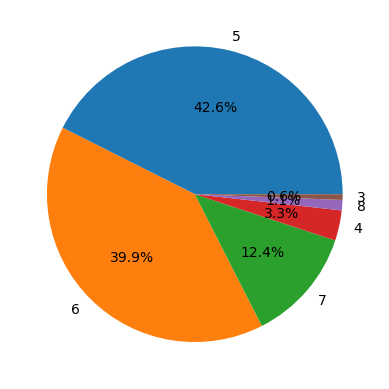

In [19]:
counts = df['quality'].value_counts()
plt.figure()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.show()

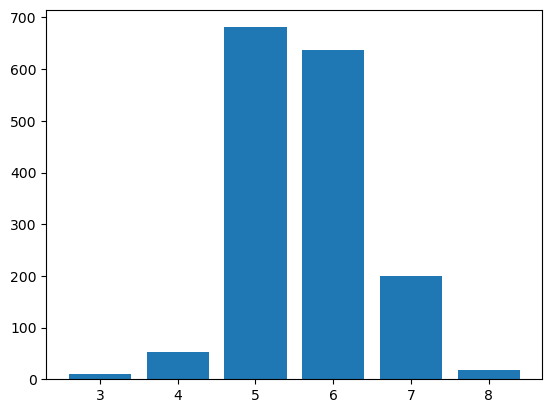

In [20]:
plt.bar(counts.index, counts)
plt.show()

C:\Users\Charvi Upreti\AppData\Local\Temp\ipykernel_21120\2700524578.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total sulfur dioxide'])


<Axes: xlabel='total sulfur dioxide', ylabel='Density'>

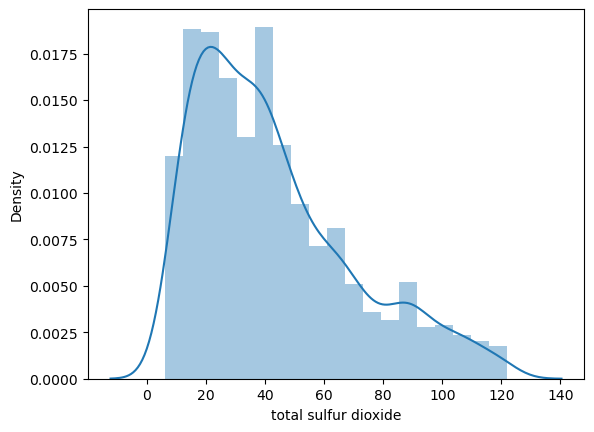

In [21]:
sns.distplot(df['total sulfur dioxide'])

### Bivariate

<Axes: xlabel='volatile acidity', ylabel='quality'>

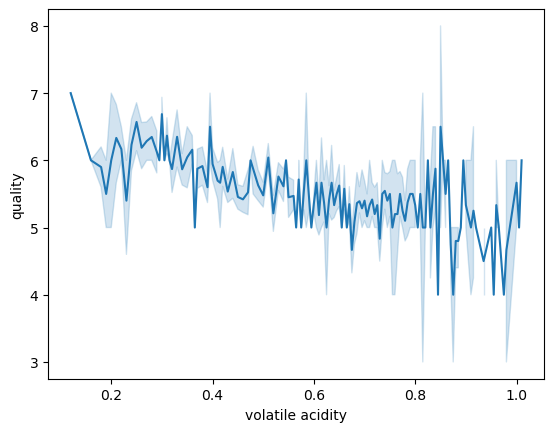

In [22]:
sns.lineplot(x = df['volatile acidity'],y=df['quality'])

<Axes: xlabel='quality', ylabel='citric acid'>

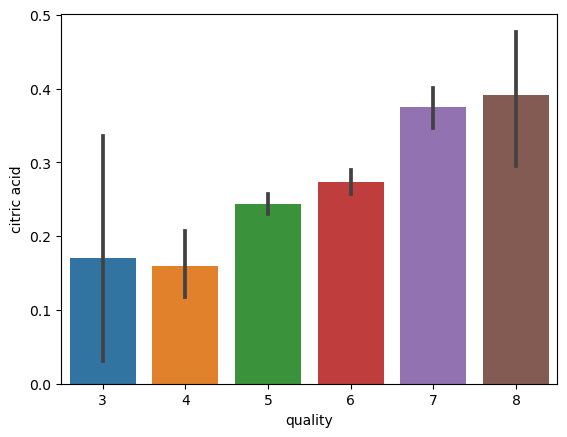

In [23]:
sns.barplot(x = df['quality'], 
            y = df['citric acid'])

<Axes: xlabel='quality', ylabel='alcohol'>

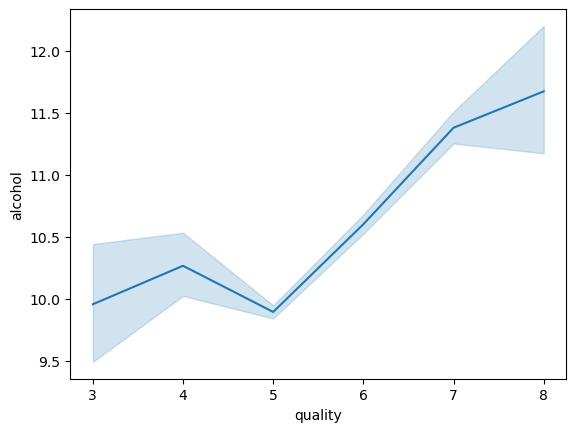

In [24]:
sns.lineplot(x=df['quality'],y=df['alcohol'])

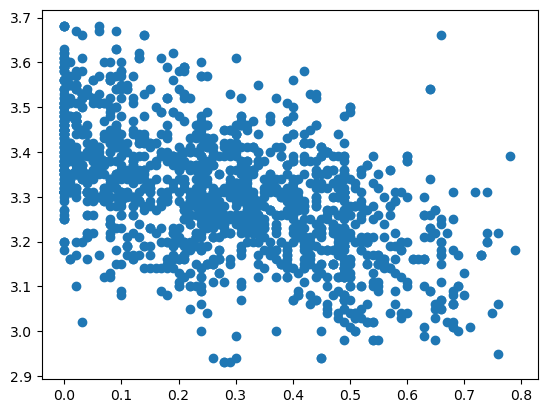

In [25]:
plt.scatter(df['citric acid'],df['pH'])

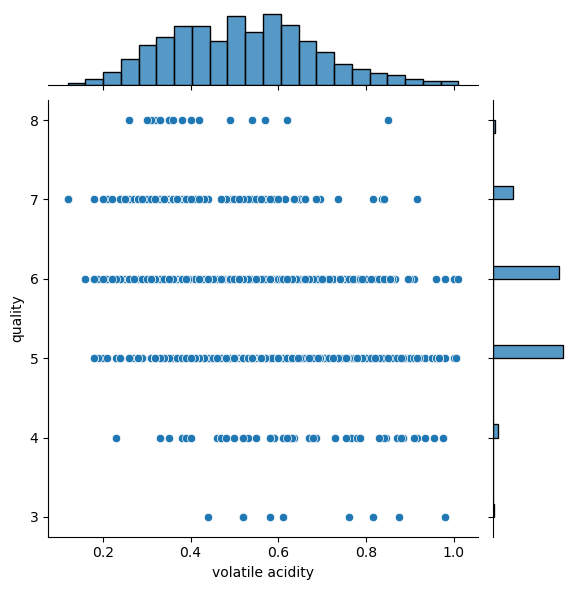

In [26]:
sns.jointplot(x = df['volatile acidity'],y=df['quality'])

### Multi-Variate Analysis

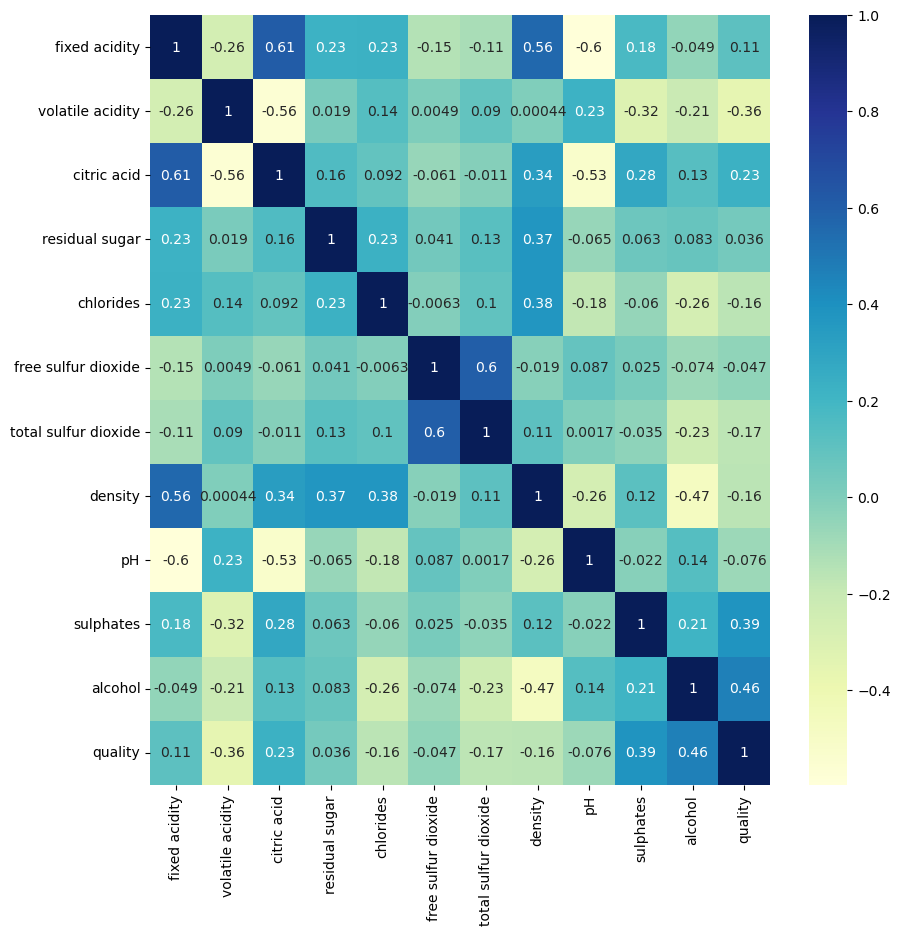

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

C:\Users\Charvi Upreti\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


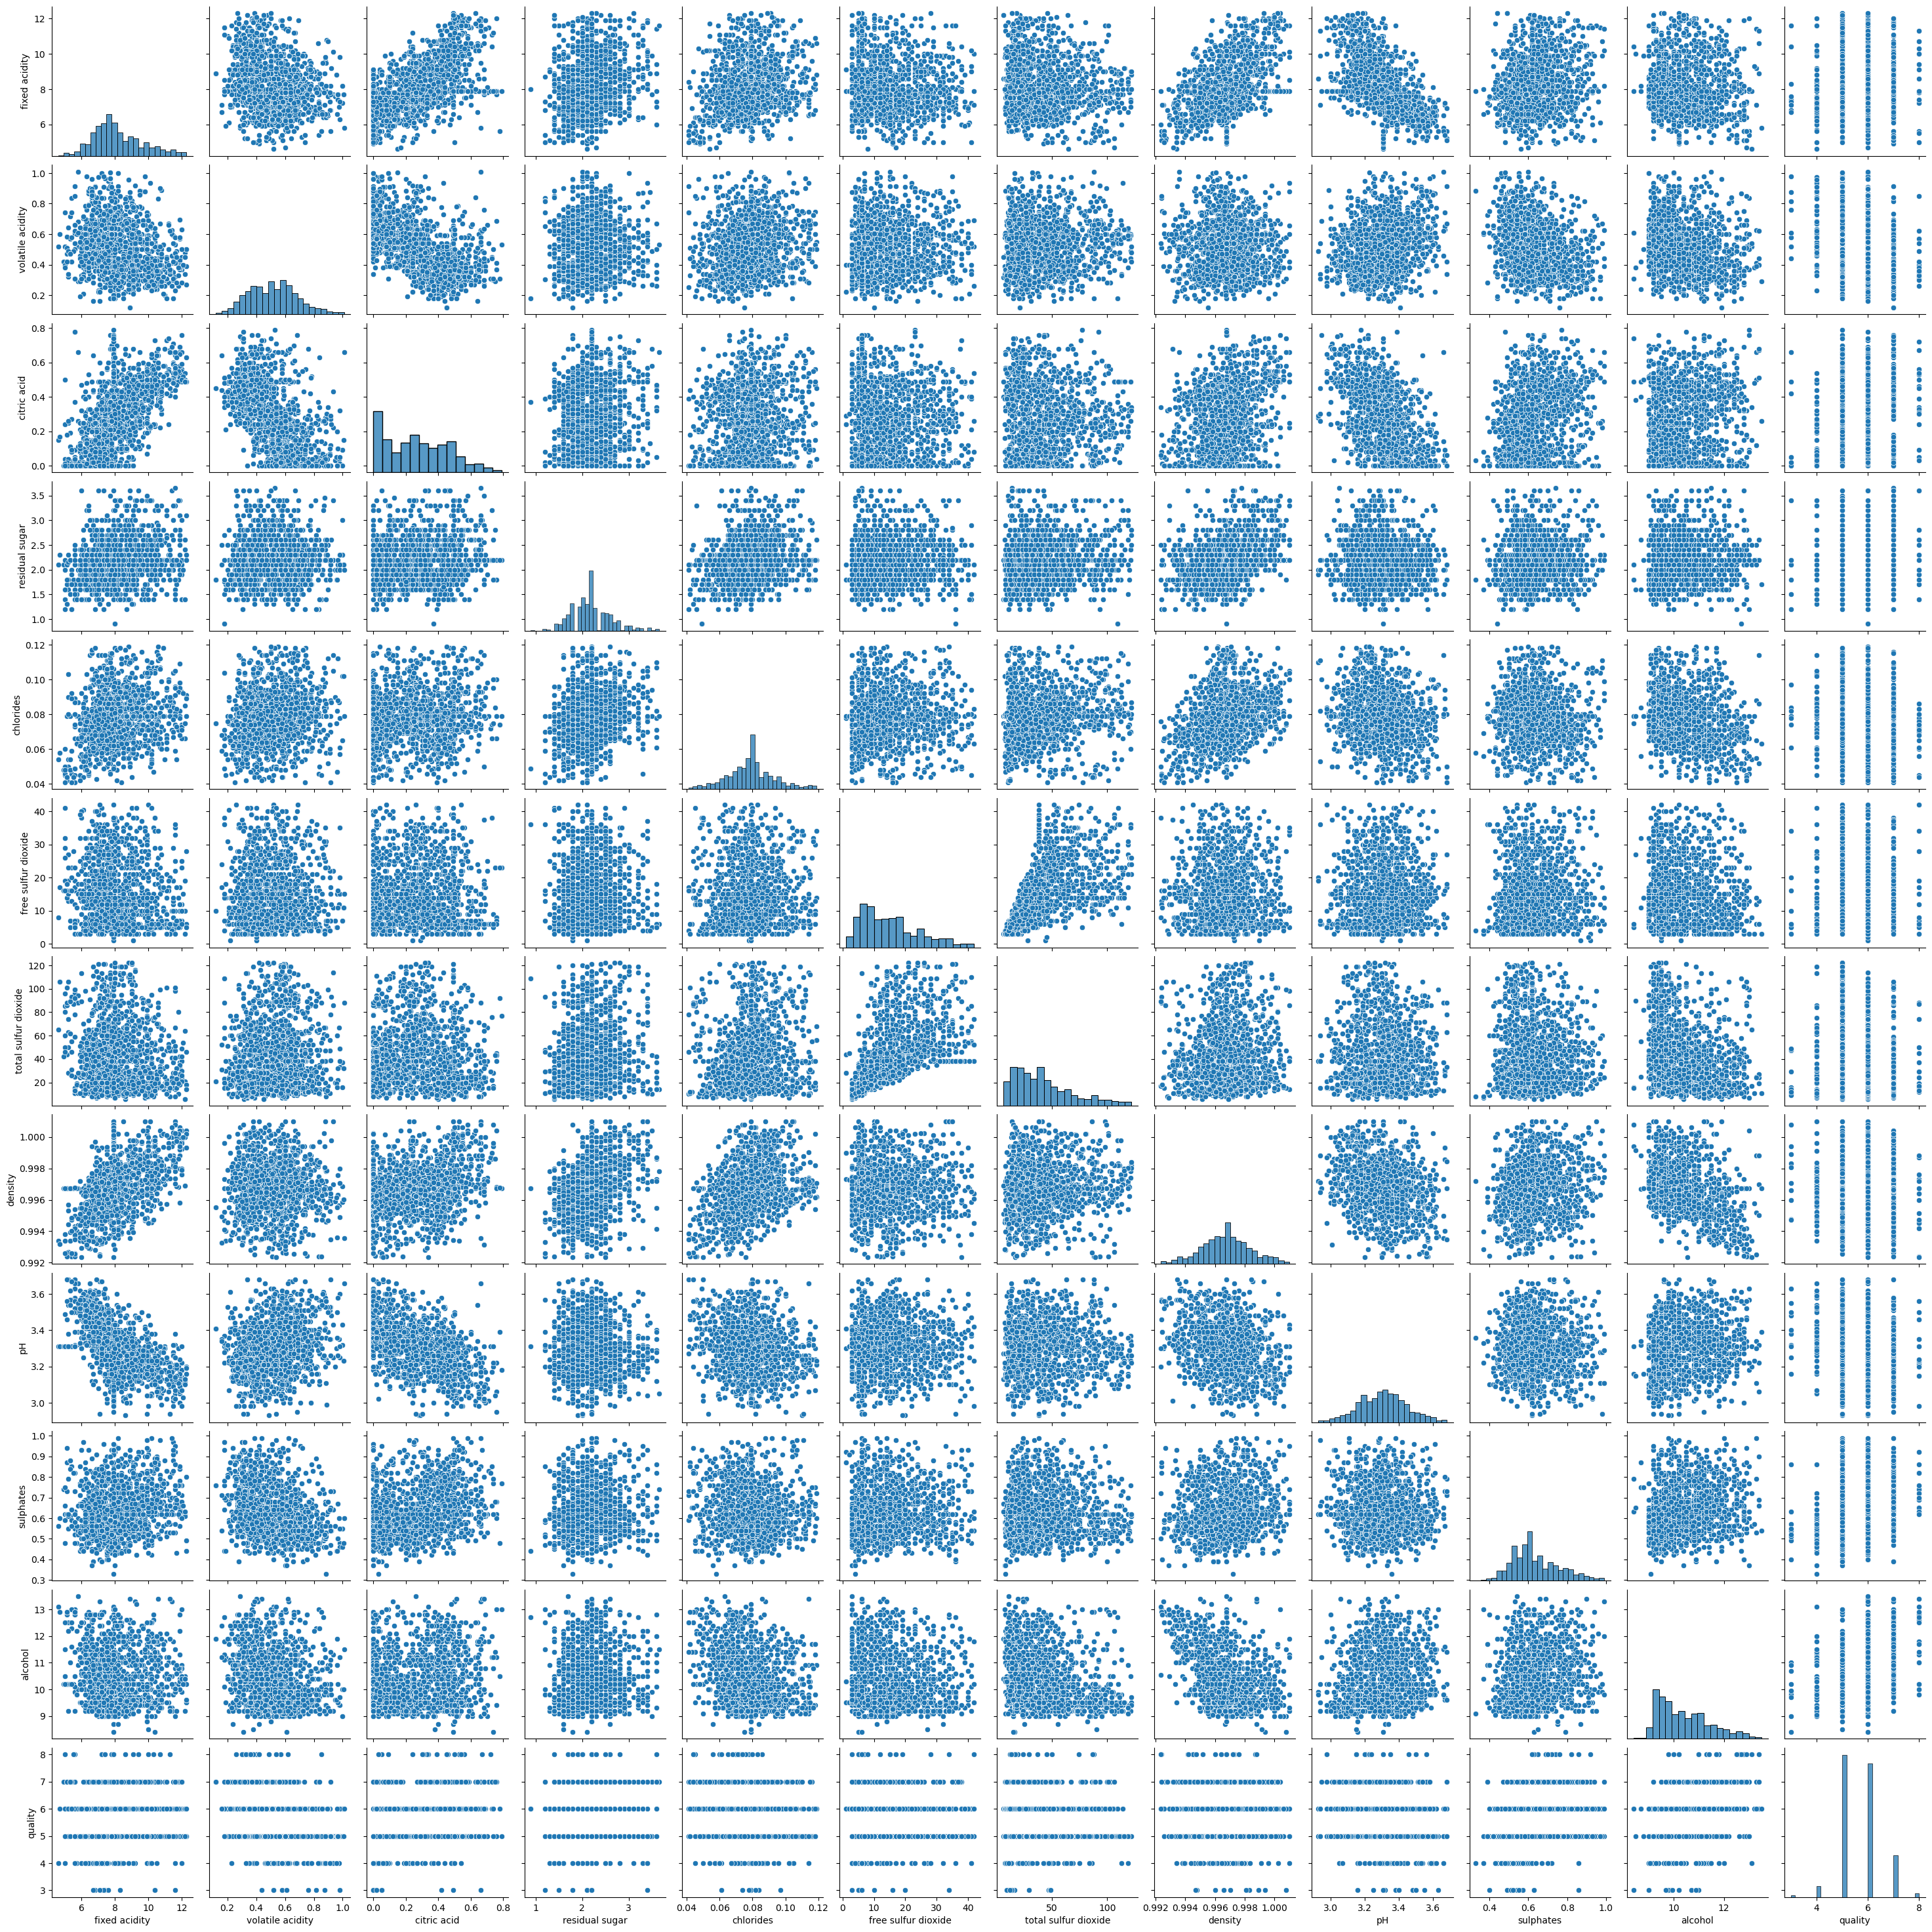

In [28]:
sns.pairplot(df)
plt.show()

### Spliting

In [29]:
#x and y split
x=df.drop(columns=['quality'],axis=1)
print(x.head().T)
y=df['quality']
y.head()

                            0        1       2       3        4
fixed acidity          7.4000   7.8000   7.800  11.200   7.4000
volatile acidity       0.7000   0.8800   0.760   0.280   0.7000
citric acid            0.0000   0.0000   0.040   0.560   0.0000
residual sugar         1.9000   2.6000   2.300   1.900   1.9000
chlorides              0.0760   0.0980   0.092   0.075   0.0760
free sulfur dioxide   11.0000  25.0000  15.000  17.000  11.0000
total sulfur dioxide  34.0000  67.0000  54.000  60.000  34.0000
density                0.9978   0.9968   0.997   0.998   0.9978
pH                     3.5100   3.2000   3.260   3.160   3.5100
sulphates              0.5600   0.6800   0.650   0.580   0.5600
alcohol                9.4000   9.8000   9.800   9.800   9.4000


0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

### Scaling

In [30]:
scale=MinMaxScaler()
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head().T

0         1         2         3         4
fixed acidity         0.363636  0.415584  0.415584  0.857143  0.363636
volatile acidity      0.651685  0.853933  0.719101  0.179775  0.651685
citric acid           0.000000  0.000000  0.050633  0.708861  0.000000
residual sugar        0.363636  0.618182  0.509091  0.363636  0.363636
chlorides             0.448718  0.730769  0.653846  0.435897  0.448718
free sulfur dioxide   0.243902  0.585366  0.341463  0.390244  0.243902
total sulfur dioxide  0.241379  0.525862  0.413793  0.465517  0.241379
density               0.630058  0.514451  0.537572  0.653179  0.630058
pH                    0.773333  0.360000  0.440000  0.306667  0.773333
sulphates             0.348485  0.530303  0.484848  0.378788  0.348485
alcohol               0.196078  0.274510  0.274510  0.274510  0.196078

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1279, 11)
(1279,)
(320, 11)
(320,)


### Machine Learning Model Building, Evaluation of the model and Test with random observation

### Linear Regression

In [32]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
#testing
print("Test result")
y_predict=lr.predict(x_test)
#R2 Score
print("R2 score",metrics.r2_score(y_test,y_predict))
#MSE (Mean Square Error)
print("MSE",metrics.mean_squared_error(y_test,y_predict))
#RMSE (Root Mean Square Error)
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

print('\n')

#to check if overfitting
y_predict1=lr.predict(x_train)
#printing to check if overfitting or underfitting
#R2 Score
print("R2 Score of training",metrics.r2_score(y_train,y_predict1))
print("R2 score of training and testing is not much different.")

print('\n')

#Checking a random obseration:-
predicted_values = lr.predict(x_test.iloc[[0]])
actual_values = y_test.iloc[[0]] 
print("Predicted " + str(predicted_values))
print("Actual " + str(actual_values))

column_names = x_test.columns

# Input data for a single observation
input_data = [0.6, 0.5, 0.43, 0.5, 0.5, 0.4, 0.3, 0.3, 0.8, 0.6, 0.4]
input_df = pd.DataFrame([input_data], columns=column_names)

# Make a prediction for the single observation
prediction_single_observation = lr.predict(input_df)

print("Prediction for the single observation:", prediction_single_observation)

input_df

Test result
R2 score 0.3318798167106596
MSE 0.3824727064884877
RMSE 0.6184437779527641


R2 Score of training 0.3515107836557766
R2 score of training and testing is not much different.


Predicted [6.05272976]
Actual 1109    6
Name: quality, dtype: int64
Prediction for the single observation: [5.63253129]


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            0.6               0.5         0.43             0.5        0.5   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol  
0                  0.4                   0.3      0.3  0.8        0.6      0.4

### Lasso and Ridge

In [34]:
r=Ridge()
l=Lasso()

In [35]:
r.fit(x_train,y_train)

Ridge()

In [36]:
l.fit(x_train,y_train)

Lasso()

In [37]:
r_pred=r.predict(x_test)
r_pred_1=r.predict(x_train)
l_pred=l.predict(x_test)
l_pred_1=l.predict(x_train)

In [38]:
Quality =pd.DataFrame({'Actual_Profit':y_test, 'Ridge_pred':r_pred,'Lasso_pred':l_pred})
Quality.head(10)

Actual_Profit  Ridge_pred  Lasso_pred
1109              6    6.043328    5.646599
1032              5    4.950493    5.646599
1002              7    6.681428    5.646599
487               6    5.156834    5.646599
979               5    5.827819    5.646599
1054              6    5.187421    5.646599
542               5    5.426785    5.646599
853               6    5.955455    5.646599
1189              4    4.752772    5.646599
412               5    5.121926    5.646599

In [39]:
print("For ridge\n")

#R2 Score
print("R2 score",metrics.r2_score(y_test,r_pred))
#printing to check if overfitting or underfitting
#R2 Score
print("R2 score for training",metrics.r2_score(y_train,r_pred_1))
#MSE (Mean Square Error)
print("MSE",metrics.mean_squared_error(y_test,r_pred))
#RMSE (Root Mean Square Error)
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,r_pred)))

print('\n')
#Checking a random obseration:-
predicted_values = r.predict(x_test.iloc[[0]])  
actual_values = y_test.iloc[[0]]  
print("Predicted " + str(predicted_values))
print("Actual " + str(actual_values))

column_names = x_test.columns

# Input data for a single observation
input_data = [0.6, 0.5, 0.43, 0.5, 0.5, 0.4, 0.3, 0.3, 0.8, 0.6, 0.4]
input_df = pd.DataFrame([input_data], columns=column_names)

# Make a prediction for the single observation
prediction_single_observation = r.predict(input_df)

print("Prediction for the single observation:", prediction_single_observation)



print('\n')
print("For Lasso")

#R2 Score
print("R2 score",metrics.r2_score(y_test,l_pred))
#printing to check if overfitting or underfitting
#R2 Score
print("R2 score with training",metrics.r2_score(y_train,l_pred_1))
#MSE (Mean Square Error)
print("MSE",metrics.mean_squared_error(y_test,l_pred))
#RMSE (Root Mean Square Error)
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,l_pred)))

print('\n')

#Checking a random obseration:-
predicted_values = l.predict(x_test.iloc[[0]])  
actual_values = y_test.iloc[[0]]  
print("Predicted " + str(predicted_values))
print("Actual " + str(actual_values))

column_names = x_test.columns

# Input data for a single observation
input_data = [0.6, 0.5, 0.43, 0.5, 0.5, 0.4, 0.3, 0.3, 0.8, 0.6, 0.4]
input_df = pd.DataFrame([input_data], columns=column_names)

# Make a prediction for the single observation
prediction_single_observation = l.predict(input_df)

print("Prediction for the single observation:", prediction_single_observation)

input_df

For ridge

R2 score 0.33460003973813257
R2 score for training 0.35135292178989475
MSE 0.3809154850639714
RMSE 0.6171835100389279


Predicted [6.04332824]
Actual 1109    6
Name: quality, dtype: int64
Prediction for the single observation: [5.65709029]


For Lasso
R2 score -0.004878947397931155
R2 score with training 0.0
MSE 0.5752539443014328
RMSE 0.7584549718351333


Predicted [5.64659891]
Actual 1109    6
Name: quality, dtype: int64
Prediction for the single observation: [5.64659891]


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            0.6               0.5         0.43             0.5        0.5   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol  
0                  0.4                   0.3      0.3  0.8        0.6      0.4

In [40]:
#Linear Regression and Ridge Regression both have similar R2 scores 
#and perform better than Lasso Regression in terms of R2.

### Logistic Regression

In [41]:
model=LogisticRegression()
model.fit(x_train,y_train)

C:\Users\Charvi Upreti\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
pred_log=model.predict(x_test)
pred_log_1=model.predict(x_train)

#Checking a random obseration:-
predicted_values = model.predict(x_test.iloc[[0]])  
actual_values = y_test.iloc[[0]]  

print("Predicted " + str(predicted_values))
print("Actual " + str(actual_values))

column_names = x_test.columns

# Input data for a single observation
input_data = [0.6, 0.5, 0.43, 0.5, 0.5, 0.4, 0.3, 0.3, 0.8, 0.6, 0.4]
input_df = pd.DataFrame([input_data], columns=column_names)

# Make a prediction for the single observation
prediction_single_observation = model.predict(input_df)

print("Prediction for the single observation:", prediction_single_observation)

input_df

Predicted [6]
Actual 1109    6
Name: quality, dtype: int64
Prediction for the single observation: [6]


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            0.6               0.5         0.43             0.5        0.5   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol  
0                  0.4                   0.3      0.3  0.8        0.6      0.4

In [43]:
print("Accurracy score: ",accuracy_score(y_test,pred_log))
print("Accurracy score with training: ",accuracy_score(y_train,pred_log_1))
print("Confusion matrix")
print(confusion_matrix(y_test,pred_log))
print("Crosstab")
pd.crosstab(y_test,pred_log)

Accurracy score:  0.621875
Accurracy score with training:  0.5957779515246286
Confusion matrix
[[  0   0   2   0   0   0]
 [  0   0   7   4   0   0]
 [  0   0 105  29   1   0]
 [  0   0  46  85  11   0]
 [  0   0   2  16   9   0]
 [  0   0   0   1   2   0]]
Crosstab


col_0      5   6   7
quality             
3          2   0   0
4          7   4   0
5        105  29   1
6         46  85  11
7          2  16   9
8          0   1   2

In [44]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.65      0.78      0.71       135
           6       0.63      0.60      0.61       142
           7       0.39      0.33      0.36        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.59      0.62      0.60       320



C:\Users\Charvi Upreti\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charvi Upreti\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charvi Upreti\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [45]:
print("Here the columns 3,4,8 were lost, this is because there samples were less.")

Here the columns 3,4,8 were lost, this is because there samples were less.


### Decision Tree

In [46]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [47]:
d_y_predict = model1.predict(x_test)
d_y_predict_train = model1.predict(x_train)

#Checking a random obseration:-
predicted_values = model1.predict(x_test.iloc[[0]])  
actual_values = y_test.iloc[[0]]  

print("Predicted " + str(predicted_values))
print("Actual " + str(actual_values))

column_names = x_test.columns

# Input data for a single observation
input_data = [0.6, 0.5, 0.43, 0.5, 0.5, 0.4, 0.3, 0.3, 0.8, 0.6, 0.4]
input_df = pd.DataFrame([input_data], columns=column_names)

# Make a prediction for the single observation
prediction_single_observation = model1.predict(input_df)

print("Prediction for the single observation:", prediction_single_observation)

input_df

Predicted [6]
Actual 1109    6
Name: quality, dtype: int64
Prediction for the single observation: [7]


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            0.6               0.5         0.43             0.5        0.5   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol  
0                  0.4                   0.3      0.3  0.8        0.6      0.4

In [48]:
print("Accurracy score: ",accuracy_score(y_test,d_y_predict ))
print("Accurracy score with training: ",accuracy_score(y_train,d_y_predict_train))
print("Confusion matrix")
print(confusion_matrix(y_test,d_y_predict))
print("Crosstab")
print(classification_report(y_test,d_y_predict))
pd.crosstab(y_test,d_y_predict)

Accurracy score:  0.621875
Accurracy score with training:  1.0
Confusion matrix
[[ 0  0  1  1  0  0]
 [ 1  1  6  3  0  0]
 [ 0  5 88 36  5  1]
 [ 0  3 23 93 21  2]
 [ 0  1  1  6 17  2]
 [ 0  0  0  1  2  0]]
Crosstab
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.09      0.10        11
           5       0.74      0.65      0.69       135
           6       0.66      0.65      0.66       142
           7       0.38      0.63      0.47        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.31      0.34      0.32       320
weighted avg       0.64      0.62      0.63       320



col_0    3  4   5   6   7  8
quality                     
3        0  0   1   1   0  0
4        1  1   6   3   0  0
5        0  5  88  36   5  1
6        0  3  23  93  21  2
7        0  1   1   6  17  2
8        0  0   0   1   2  0

In [49]:
print(classification_report(y_test,d_y_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.09      0.10        11
           5       0.74      0.65      0.69       135
           6       0.66      0.65      0.66       142
           7       0.38      0.63      0.47        27
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.31      0.34      0.32       320
weighted avg       0.64      0.62      0.63       320



In [50]:
print("The model seems to be overfit.")
print("Unlike logistic regression, No quality was lost in predictions.")

The model seems to be overfit.
Unlike logistic regression, No quality was lost in predictions.


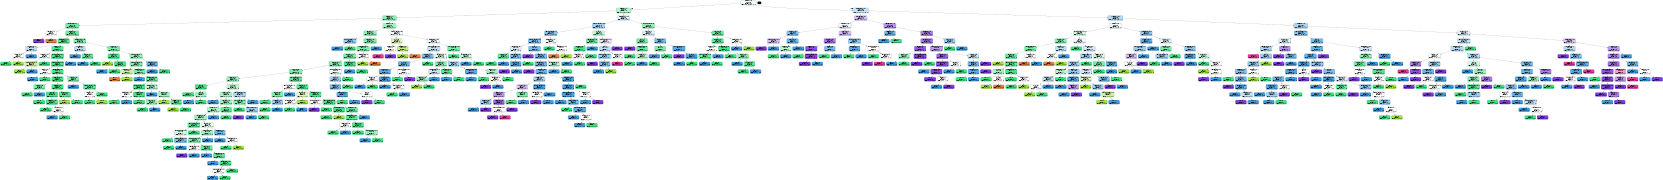

In [51]:
dot_data = StringIO()
export_graphviz(model1, out_file=dot_data, feature_names=x.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.set_dpi(5)
Image(graph.create_png())


### Random Forest Classifier

In [52]:
model2=RandomForestClassifier()
model2.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
r_y_predict=model2.predict(x_test)
r_y_predict_train=model2.predict(x_train)

#Checking a random obseration:-
predicted_values = model2.predict(x_test.iloc[[0]])  
actual_values = y_test.iloc[[0]]  

print("Predicted " + str(predicted_values))
print("Actual " + str(actual_values))

column_names = x_test.columns

# Input data for a single observation
input_data = [0.6, 0.5, 0.43, 0.5, 0.5, 0.4, 0.3, 0.3, 0.8, 0.6, 0.4]
input_df = pd.DataFrame([input_data], columns=column_names)

# Make a prediction for the single observation
prediction_single_observation = model2.predict(input_df)

print("Prediction for the single observation:", prediction_single_observation)

input_df

Predicted [6]
Actual 1109    6
Name: quality, dtype: int64
Prediction for the single observation: [6]


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            0.6               0.5         0.43             0.5        0.5   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol  
0                  0.4                   0.3      0.3  0.8        0.6      0.4

In [54]:
print("Accurracy score: ",accuracy_score(y_test,r_y_predict ))
print("Accurracy score with training: ",accuracy_score(y_train,r_y_predict_train))
print("Confusion matrix")
print(confusion_matrix(y_test,r_y_predict))
print("Crosstab")
pd.crosstab(y_test,r_y_predict)

Accurracy score:  0.71875
Accurracy score with training:  1.0
Confusion matrix
[[  0   0   1   1   0   0]
 [  0   0   6   5   0   0]
 [  0   0 113  21   1   0]
 [  0   0  30 101  11   0]
 [  0   0   1   8  16   2]
 [  0   0   0   1   2   0]]
Crosstab


col_0      5    6   7  8
quality                 
3          1    1   0  0
4          6    5   0  0
5        113   21   1  0
6         30  101  11  0
7          1    8  16  2
8          0    1   2  0

In [55]:
print(classification_report(y_test,r_y_predict))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.75      0.84      0.79       135
           6       0.74      0.71      0.72       142
           7       0.53      0.59      0.56        27
           8       0.00      0.00      0.00         3

    accuracy                           0.72       320
   macro avg       0.34      0.36      0.35       320
weighted avg       0.69      0.72      0.70       320



C:\Users\Charvi Upreti\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charvi Upreti\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charvi Upreti\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [56]:
#Random forest based on entropy
model3 = RandomForestClassifier(criterion='entropy')
model3.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy')

In [57]:
r_y_predict_1 = model3.predict(x_test)
r_y_predict_train_1 = model3.predict(x_train)

#Checking a random obseration:-
predicted_values = model3.predict(x_test.iloc[[0]])  
actual_values = y_test.iloc[[0]]  

print("Predicted " + str(predicted_values))
print("Actual " + str(actual_values))

column_names = x_test.columns

# Input data for a single observation
input_data = [0.6, 0.5, 0.43, 0.5, 0.5, 0.4, 0.3, 0.3, 0.8, 0.6, 0.4]
input_df = pd.DataFrame([input_data], columns=column_names)

# Make a prediction for the single observation
prediction_single_observation = model3.predict(input_df)

print("Prediction for the single observation:", prediction_single_observation)

input_df

Predicted [6]
Actual 1109    6
Name: quality, dtype: int64
Prediction for the single observation: [6]


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            0.6               0.5         0.43             0.5        0.5   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol  
0                  0.4                   0.3      0.3  0.8        0.6      0.4

In [58]:
print("Accurracy score: ",accuracy_score(y_test,r_y_predict_1))
print("Accurracy score with training: ",accuracy_score(y_train,r_y_predict_train_1))
print("Confusion matrix")
print(confusion_matrix(y_test,r_y_predict_1))
print("Crosstab")
pd.crosstab(y_test,r_y_predict_1)

Accurracy score:  0.715625
Accurracy score with training:  1.0
Confusion matrix
[[  0   0   1   1   0   0]
 [  0   0   7   4   0   0]
 [  0   0 112  22   1   0]
 [  0   0  28 102  12   0]
 [  0   0   0  10  15   2]
 [  0   0   0   1   2   0]]
Crosstab


col_0      5    6   7  8
quality                 
3          1    1   0  0
4          7    4   0  0
5        112   22   1  0
6         28  102  12  0
7          0   10  15  2
8          0    1   2  0

In [59]:
print(classification_report(y_test,r_y_predict_1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.76      0.83      0.79       135
           6       0.73      0.72      0.72       142
           7       0.50      0.56      0.53        27
           8       0.00      0.00      0.00         3

    accuracy                           0.72       320
   macro avg       0.33      0.35      0.34       320
weighted avg       0.68      0.72      0.70       320



C:\Users\Charvi Upreti\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charvi Upreti\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Charvi Upreti\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [60]:
print("Maximum Accuracy reached was with Random forest classifier and is ",accuracy_score(y_test,r_y_predict))

Maximum Accuracy reached was with Random forest classifier and is  0.71875


### Trying binary classification to get a better accuracy (Good: 1 vs Bad: 0 Wine)

In [61]:
df['quality'].value_counts().sort_index(ascending=True)

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

In [62]:
y_train = y_train.replace([3, 4, 5,6], 0)
y_train = y_train.replace([7, 8], 1)
y_train

642     0
679     0
473     0
390     1
1096    0
       ..
763     0
835     0
1216    0
559     0
684     0
Name: quality, Length: 1279, dtype: int64

In [63]:
y_train.value_counts()

0    1092
1     187
Name: quality, dtype: int64

In [64]:
y_test = y_test.replace([3, 4, 5,6], 0)
y_test = y_test.replace([7, 8], 1)
y_test

1109    0
1032    0
1002    1
487     0
979     0
       ..
794     0
813     0
1322    0
704     0
1023    0
Name: quality, Length: 320, dtype: int64

In [65]:
y_test.value_counts()

0    290
1     30
Name: quality, dtype: int64

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

combined_y = np.concatenate((y_test, y_train))

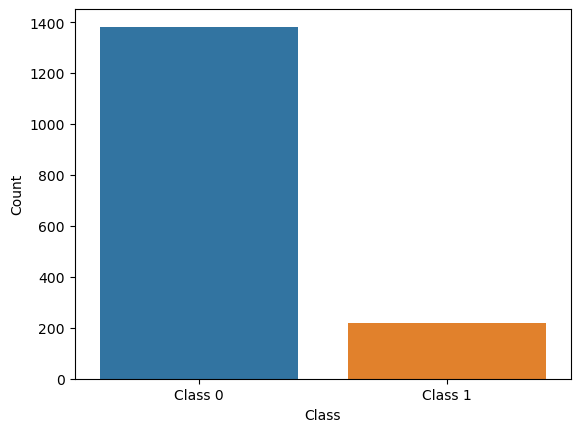

In [67]:
# Create a countplot using Seaborn
sns.countplot(x=combined_y)

# Set labels for x and y axes
plt.xlabel("Class")
plt.ylabel("Count")

# Set class labels for the x-axis ticks (0 and 1)
plt.xticks([0, 1], ["Class 0", "Class 1"])

# Show the plot
plt.show()

In [68]:
model_random = RandomForestClassifier()
# Train the model on the training data.
model_random.fit(x_train, y_train)
predictions = model_random.predict(x_test)
#  Accuracy Score.
print(accuracy_score(y_test, predictions))

0.928125


In [69]:
print("Having only 2 classes increased the accuracy to",accuracy_score(y_test, predictions))

Having only 2 classes increased the accuracy to 0.928125


In [70]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       290
           1       0.63      0.57      0.60        30

    accuracy                           0.93       320
   macro avg       0.79      0.77      0.78       320
weighted avg       0.93      0.93      0.93       320



In [71]:
column_names = x_test.columns

# Input data for a single observation
input_data = [0.6, 0.5, 0.43, 0.5, 0.5, 0.4, 0.3, 0.3, 0.8, 0.6, 0.4]
input_df = pd.DataFrame([input_data], columns=column_names)

# Make a prediction for the single observation
prediction_single_observation = model_random.predict(input_df)

print("Prediction for the single observation:", prediction_single_observation)

input_df

Prediction for the single observation: [0]


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            0.6               0.5         0.43             0.5        0.5   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol  
0                  0.4                   0.3      0.3  0.8        0.6      0.4

#### Trying Resampling to increase accuracy on multiple classes

In [72]:
df=pd.read_csv("C:/Users/Charvi Upreti/Desktop/Assignments/Assignment 4/winequality-red.csv")

In [73]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [74]:
# majority
df_5 = df[df.quality==5]     
df_6 = df[df.quality==6]     
# to_resample
df_7 = df[df.quality==7]     
df_4 = df[df.quality==4]     
df_8 = df[df.quality==8]     
df_3 = df[df.quality==3]            

In [75]:
from sklearn.utils import resample
#upsampling
df_3 = resample(df_3, replace=True, n_samples=600, random_state=0) 
df_4 = resample(df_4, replace=True, n_samples=600, random_state=0) 
df_7 = resample(df_7, replace=True, n_samples=600, random_state=0) 
df_8 = resample(df_8, replace=True, n_samples=600, random_state=0) 

In [76]:
new_df=pd.concat([df_3, df_4, df_5, df_6,df_7,df_8]).reset_index(drop=True) #Concat sequentially

In [77]:
new_df['quality'].value_counts()

5    681
6    638
3    600
4    600
7    600
8    600
Name: quality, dtype: int64

In [78]:
#x and y split
x=new_df.drop(columns=['quality'],axis=1)
print(x.head().T)
y=new_df['quality']
y.head()

                             0        1         2         3         4
fixed acidity          7.60000  11.6000  10.40000  10.40000   7.30000
volatile acidity       1.58000   0.5800   0.44000   0.44000   0.98000
citric acid            0.00000   0.6600   0.42000   0.42000   0.05000
residual sugar         2.10000   2.2000   1.50000   1.50000   2.10000
chlorides              0.13700   0.0740   0.14500   0.14500   0.06100
free sulfur dioxide    5.00000  10.0000  34.00000  34.00000  20.00000
total sulfur dioxide   9.00000  47.0000  48.00000  48.00000  49.00000
density                0.99476   1.0008   0.99832   0.99832   0.99705
pH                     3.50000   3.2500   3.38000   3.38000   3.31000
sulphates              0.40000   0.5700   0.86000   0.86000   0.55000
alcohol               10.90000   9.0000   9.90000   9.90000   9.70000


0    3
1    3
2    3
3    3
4    3
Name: quality, dtype: int64

In [79]:
scale=MinMaxScaler()
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)
x_scaled.head().T

0         1         2         3         4
fixed acidity         0.265487  0.619469  0.513274  0.513274  0.238938
volatile acidity      1.000000  0.315068  0.219178  0.219178  0.589041
citric acid           0.000000  0.660000  0.420000  0.420000  0.050000
residual sugar        0.082192  0.089041  0.041096  0.041096  0.082192
chlorides             0.208681  0.103506  0.222037  0.222037  0.081803
free sulfur dioxide   0.056338  0.126761  0.464789  0.464789  0.267606
total sulfur dioxide  0.010601  0.144876  0.148410  0.148410  0.151943
density               0.344347  0.787812  0.605727  0.605727  0.512482
pH                    0.598425  0.401575  0.503937  0.503937  0.448819
sulphates             0.041916  0.143713  0.317365  0.317365  0.131737
alcohol               0.384615  0.092308  0.230769  0.230769  0.200000

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2975, 11)
(2975,)
(744, 11)
(744,)


In [81]:
model4=RandomForestClassifier()
model4.fit(x_train,y_train)

RandomForestClassifier()

In [82]:
r_y_predict3=model4.predict(x_test)
r_y_predict_train3=model4.predict(x_train)

#Checking a random obseration:-
predicted_values = model4.predict(x_test.iloc[[0]])  
actual_values = y_test.iloc[[0]]  

print("Predicted " + str(predicted_values))
print("Actual " + str(actual_values))

column_names = x_test.columns

# Input data for a single observation
input_data = [0.6, 0.5, 0.43, 0.5, 0.5, 0.4, 0.3, 0.3, 0.8, 0.6, 0.4]
input_df = pd.DataFrame([input_data], columns=column_names)

# Make a prediction for the single observation
prediction_single_observation = model4.predict(input_df)

print("Prediction for the single observation:", prediction_single_observation)

input_df

Predicted [8]
Actual 3697    8
Name: quality, dtype: int64
Prediction for the single observation: [6]


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            0.6               0.5         0.43             0.5        0.5   

   free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol  
0                  0.4                   0.3      0.3  0.8        0.6      0.4

In [83]:
print("Accurracy score: ",accuracy_score(y_test,r_y_predict3 ))
print("Accurracy score with training: ",accuracy_score(y_train,r_y_predict_train3))
#overfit
print("Confusion matrix")
print(confusion_matrix(y_test,r_y_predict3))
print("Crosstab")
print(classification_report(y_test,r_y_predict3))
pd.crosstab(y_test,r_y_predict3)

Accurracy score:  0.9233870967741935
Accurracy score with training:  1.0
Confusion matrix
[[143   0   0   0   0   0]
 [  0 120   0   0   0   0]
 [  0   1  99  19   1   0]
 [  0   0  20  96  14   0]
 [  0   0   0   2 114   0]
 [  0   0   0   0   0 115]]
Crosstab
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       143
           4       0.99      1.00      1.00       120
           5       0.83      0.82      0.83       120
           6       0.82      0.74      0.78       130
           7       0.88      0.98      0.93       116
           8       1.00      1.00      1.00       115

    accuracy                           0.92       744
   macro avg       0.92      0.92      0.92       744
weighted avg       0.92      0.92      0.92       744



col_0      3    4   5   6    7    8
quality                            
3        143    0   0   0    0    0
4          0  120   0   0    0    0
5          0    1  99  19    1    0
6          0    0  20  96   14    0
7          0    0   0   2  114    0
8          0    0   0   0    0  115

In [84]:
print("Resampling increased the accuracy to",accuracy_score(y_test,r_y_predict3))

Resampling increased the accuracy to 0.9233870967741935
